# Introduction to Data Science and Python assignment

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# config inline plots
%matplotlib inline

## Creating the dataframe

In [2]:
df_gdp = pd.read_csv('../datasets/gdp-per-capita-penn-world-table.csv')
df_gdp.head()

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1970,3114.0884
1,Albania,ALB,1971,3159.8088
2,Albania,ALB,1972,3214.6665
3,Albania,ALB,1973,3267.8481
4,Albania,ALB,1974,3330.0708


In [3]:
df_life = pd.read_csv('../datasets/life-expectancy.csv')
df_life.head()

,Entity,Code,Year,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2


In [4]:
df = pd.merge(df_gdp, df_life, on=['Code', 'Year'])
df.drop('Entity_y', axis=1, inplace=True)
df.rename(columns={'Entity_x': 'Entity'}, inplace=True)

In [5]:
df

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical)
0,Albania,ALB,1970,3114.0884,64.8
1,Albania,ALB,1971,3159.8088,65.6
2,Albania,ALB,1972,3214.6665,66.4
3,Albania,ALB,1973,3267.8481,67.1
4,Albania,ALB,1974,3330.0708,67.8
...,...,...,...,...,...
10394,Zimbabwe,ZWE,2015,2880.9058,59.6
10395,Zimbabwe,ZWE,2016,2919.6170,60.3
10396,Zimbabwe,ZWE,2017,3112.8750,60.7
10397,Zimbabwe,ZWE,2018,3007.2370,61.4


In [6]:
# Grouping by 'Category' and finding the intersection of values between groups
grouped = df.groupby('Code')['Year'].apply(set)

# Finding the common values between categories
common_values = set.intersection(*grouped)

print(common_values)

{2016, 2017, 2018, 2019, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [7]:
filtered_df = df[df['Year'].isin(common_values)]

In [8]:
filtered_df

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical)
35,Albania,ALB,2005,6531.7970,76.6
36,Albania,ALB,2006,7108.6143,76.8
37,Albania,ALB,2007,7666.5283,77.5
38,Albania,ALB,2008,8615.2400,77.7
39,Albania,ALB,2009,9320.3680,77.8
...,...,...,...,...,...
10394,Zimbabwe,ZWE,2015,2880.9058,59.6
10395,Zimbabwe,ZWE,2016,2919.6170,60.3
10396,Zimbabwe,ZWE,2017,3112.8750,60.7
10397,Zimbabwe,ZWE,2018,3007.2370,61.4


## Data cleaning

### GDP dataset

In [9]:
print(grouped)

Code
ABW    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
AGO    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
AIA    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
ALB    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
ARE    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
                             ...                        
VNM    {1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
YEM    {1989, 1990, 1991, 1992, 1993, 1994, 1995, 199...
ZAF    {1950, 1951, 1952, 1953, 1954, 1955, 1956, 195...
ZMB    {1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...
ZWE    {1954, 1955, 1956, 1957, 1958, 1959, 1960, 196...
Name: Year, Length: 183, dtype: object


In [10]:
# unique code and year

In [11]:
#check if the specific year(eg:1970) exist in the data for every Contry
df_life['Year'].describe()

count    20449.000000
mean      1976.530539
std         37.741137
min       1543.000000
25%       1962.000000
50%       1982.000000
75%       2002.000000
max       2021.000000
Name: Year, dtype: float64

# 

## Single year comparison (2016)

- Create a dataframe that is the intersection of country code and year of the 2 datasets.

- Select a single year that was obtained before in "common_values" (if a different year is selected the result might differ)

In [12]:
df_single_year = pd.merge(df_gdp, df_life, on=['Code', 'Year'])
df_single_year.drop('Entity_y', axis=1, inplace=True)
df_single_year.rename(columns={'Entity_x': 'Entity'}, inplace=True)

common_values_list = list(common_values)

year = common_values_list[0]

df_single_year = df_single_year[df_single_year['Year'] == year]

df_single_year

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical)
46,Albania,ALB,2016,11674.5890,78.9
106,Algeria,DZA,2016,11854.6040,75.7
156,Angola,AGO,2016,7581.5454,61.1
206,Anguilla,AIA,2016,15636.5130,76.8
256,Antigua and Barbuda,ATG,2016,16229.5690,78.2
...,...,...,...,...,...
10183,Venezuela,VEN,2016,2127.1830,72.1
10233,Vietnam,VNM,2016,6368.6510,73.9
10264,Yemen,YEM,2016,2023.4292,66.1
10329,Zambia,ZMB,2016,3324.5050,61.8


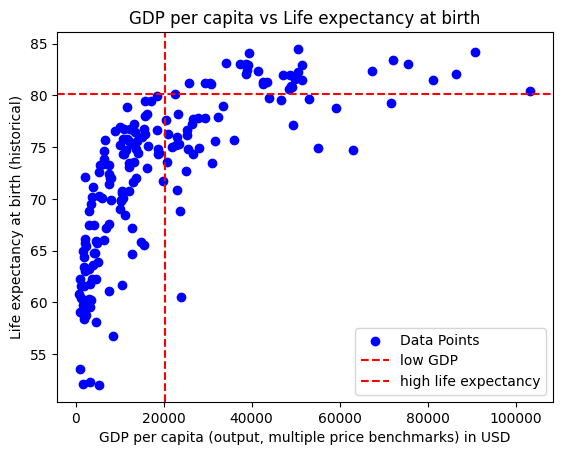

In [54]:
# Create a scatter plot
plt.scatter(df_single_year['GDP per capita (output, multiple price benchmarks)'], 
df_single_year['Life expectancy at birth (historical)'], label='Data Points', color='blue', marker='o')

# Adding labels and title
plt.xlabel('GDP per capita (output, multiple price benchmarks) in USD')
plt.ylabel('Life expectancy at birth (historical)')
plt.title('GDP per capita vs Life expectancy at birth')

life_std_single = df_single_year['Life expectancy at birth (historical)'].std()
life_mean_single = df_single_year['Life expectancy at birth (historical)'].mean()

plt.axvline(x=df_single_year['GDP per capita (output, multiple price benchmarks)'].mean(), color='red', linestyle='--', label='low GDP')
plt.axhline(y=df_single_year['Life expectancy at birth (historical)'].std() + df_single_year['Life expectancy at birth (historical)'].mean(), color='red', linestyle='--', label='high life expectancy')


# Adding legend
plt.legend()

# Display the plot
plt.show()

## 1 - Life expectancy higher than one standard deviation above the mean (single year)

In [14]:
life_std = df_single_year['Life expectancy at birth (historical)'].std()
life_mean = df_single_year['Life expectancy at birth (historical)'].mean()

life_std, life_mean

(7.736162442170663, 72.42622950819673)

In [52]:
countries = df_single_year[df_single_year['Life expectancy at birth (historical)'] > life_std + life_mean]['Entity'].unique()
print(f'{len(countries)} countries with high life expectancy:')
print(countries)

32 countries with high life expectancy:
['Australia' 'Austria' 'Belgium' 'Bermuda' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Luxembourg' 'Macao' 'Malta' 'Netherlands'
 'New Zealand' 'Norway' 'Portugal' 'Qatar' 'Singapore' 'Slovenia'
 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom']


## 2. Which countries have high life expectancy but have low GDP (note the difference between GDP
and GDP per capita)? Motivate how you have chosen to define “high” and “low.

Low GDP - Less than the mean of GDP per capita in every country (for the year chosen above). Did not make sense to use standard deviation in this case because the countries' GDP's per capita vary way too much.

High Life Expectancy - More than one standard deviation above the mean of life expectancy in every country for the year chosen above)

The obtained scatter plot is divided into 4 quadrants:

- Top right quadrant - High Life Expectancy & High GDP

- Bottom right quadrant - Low Life Expectancy & High GDP

- Bottom left quadrant - Low Life Expectancy & Low GDP

- Top left quadrant - High Life Expectancy & low GDP

The results show that there is no country with high life expectancy and low GDP.

In [19]:
df_single_year

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Life expectancy at birth (historical)
46,Albania,ALB,2016,11674.5890,78.9
106,Algeria,DZA,2016,11854.6040,75.7
156,Angola,AGO,2016,7581.5454,61.1
206,Anguilla,AIA,2016,15636.5130,76.8
256,Antigua and Barbuda,ATG,2016,16229.5690,78.2
...,...,...,...,...,...
10183,Venezuela,VEN,2016,2127.1830,72.1
10233,Vietnam,VNM,2016,6368.6510,73.9
10264,Yemen,YEM,2016,2023.4292,66.1
10329,Zambia,ZMB,2016,3324.5050,61.8


In [51]:
gdp = df_single_year['GDP per capita (output, multiple price benchmarks)'].mean()

high_life_exp = df_single_year[df_single_year['Life expectancy at birth (historical)'] > life_std + life_mean]
high_life_low_gdp = high_life_exp[high_life_exp['GDP per capita (output, multiple price benchmarks)'] < gdp]


print(f'{len(high_life_low_gdp)} countries with high life expectancy and low GDP.')

0 countries with high life expectancy and low GDP.


## 3. Does every strong economy (normally indicated by GDP) have high life expectancy?

As indicated by the scatter plot, there is a great number of countries that that belong to the bottom right quadrant, therefore, not every strong economy has high life expectancy.

In [57]:
low_life_exp = df_single_year[df_single_year['Life expectancy at birth (historical)']<life_mean+life_std]
high_gdp_low_life=low_life_exp[low_life_exp['GDP per capita (output, multiple price benchmarks)']>gdp]
print(f'{len(high_gdp_low_life)} countries with low life expectancy and High GDP.')

35 countries with low life expectancy and High GDP.


## 4. Related to the above question (question 3), what happens if you use GDP per capita as an indicator of a strong economy as opposed to GDP alone? Explain the results you obtain through this analysis, and discuss any insights you get from comparing these results to question 3.

In [61]:
input_1 = 1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cfa57f0-6d90-4c5d-a7d6-29d1b561f0e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>